In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
colors=sns.color_palette("deep")
sns.set_context(rc={'figure.figsize':(18,5)})
pd.set_option('display.max_columns', 10)
pd.set_option('display.max_rows', 10)

+ 我思故我在
+ 数据是新时代的石油
+ 数据总是混乱的
+ 数据探索
+ Data Story- Turn Data Into Insight!

### 提出问题

+ 航班延迟情况如何？起飞延迟，到达延迟？
+ 每个州延迟情况？延迟比例？
+ 机场间延迟是否存在某种趋势？
+ 每天延迟情况怎么样？

# load data


http://www.transtats.bts.gov/Fields.asp?Table_ID=236

In [47]:
data=pd.read_csv('../data/airport-ontime.csv')
data.head()

,FL_DATE,UNIQUE_CARRIER,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,...,ARR_DELAY_NEW,ARR_DEL15,DISTANCE,DISTANCE_GROUP,Unnamed: 16
0,2014-06-01,AA,12478,1247802,31703,...,0.0,0.0,2475.0,10,NaN
1,2014-06-01,AA,12892,1289203,32575,...,0.0,0.0,2475.0,10,NaN
2,2014-06-01,AA,12478,1247802,31703,...,0.0,0.0,2475.0,10,NaN
3,2014-06-01,AA,12892,1289203,32575,...,160.0,1.0,2475.0,10,NaN
4,2014-06-01,AA,11298,1129803,30194,...,0.0,0.0,3784.0,11,NaN


In [48]:
data.shape

(502617, 17)

In [8]:
data.columns

Index(['FL_DATE', 'UNIQUE_CARRIER', 'ORIGIN_AIRPORT_ID',
       'ORIGIN_AIRPORT_SEQ_ID', 'ORIGIN_CITY_MARKET_ID', 'ORIGIN_STATE_ABR',
       'DEST_AIRPORT_ID', 'DEST_AIRPORT_SEQ_ID', 'DEST_CITY_MARKET_ID',
       'DEST_STATE_ABR', 'DEP_DELAY_NEW', 'DEP_DEL15', 'ARR_DELAY_NEW',
       'ARR_DEL15', 'DISTANCE', 'DISTANCE_GROUP', 'Unnamed: 16'],
      dtype='object')

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 502617 entries, 0 to 502616
Data columns (total 17 columns):
FL_DATE                  502617 non-null object
UNIQUE_CARRIER           502617 non-null object
ORIGIN_AIRPORT_ID        502617 non-null int64
ORIGIN_AIRPORT_SEQ_ID    502617 non-null int64
ORIGIN_CITY_MARKET_ID    502617 non-null int64
ORIGIN_STATE_ABR         502617 non-null object
DEST_AIRPORT_ID          502617 non-null int64
DEST_AIRPORT_SEQ_ID      502617 non-null int64
DEST_CITY_MARKET_ID      502617 non-null int64
DEST_STATE_ABR           502617 non-null object
DEP_DELAY_NEW            492974 non-null float64
DEP_DEL15                492974 non-null float64
ARR_DELAY_NEW            490716 non-null float64
ARR_DEL15                490716 non-null float64
DISTANCE                 502617 non-null float64
DISTANCE_GROUP           502617 non-null int64
Unnamed: 16              0 non-null float64
dtypes: float64(6), int64(7), object(4)
memory usage: 65.2+ MB


In [49]:
data.dropna(how='all',inplace=True,axis=1)

In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 502617 entries, 0 to 502616
Data columns (total 16 columns):
FL_DATE                  502617 non-null object
UNIQUE_CARRIER           502617 non-null object
ORIGIN_AIRPORT_ID        502617 non-null int64
ORIGIN_AIRPORT_SEQ_ID    502617 non-null int64
ORIGIN_CITY_MARKET_ID    502617 non-null int64
ORIGIN_STATE_ABR         502617 non-null object
DEST_AIRPORT_ID          502617 non-null int64
DEST_AIRPORT_SEQ_ID      502617 non-null int64
DEST_CITY_MARKET_ID      502617 non-null int64
DEST_STATE_ABR           502617 non-null object
DEP_DELAY_NEW            492974 non-null float64
DEP_DEL15                492974 non-null float64
ARR_DELAY_NEW            490716 non-null float64
ARR_DEL15                490716 non-null float64
DISTANCE                 502617 non-null float64
DISTANCE_GROUP           502617 non-null int64
dtypes: float64(5), int64(7), object(4)
memory usage: 61.4+ MB


In [52]:
data.isnull().sum()

FL_DATE                      0
UNIQUE_CARRIER               0
ORIGIN_AIRPORT_ID            0
ORIGIN_AIRPORT_SEQ_ID        0
ORIGIN_CITY_MARKET_ID        0
                         ...  
DEP_DEL15                 9643
ARR_DELAY_NEW            11901
ARR_DEL15                11901
DISTANCE                     0
DISTANCE_GROUP               0
dtype: int64

# 起飞以及到达的延迟情况

In [53]:
data.DEP_DEL15.head()

0    0.0
1    0.0
2    0.0
3    1.0
4    0.0
Name: DEP_DEL15, dtype: float64

In [54]:
data.DEP_DEL15.value_counts()/len(data)
# 起飞还是挺准时的 

0.0    0.731812
1.0    0.249003
Name: DEP_DEL15, dtype: float64

In [55]:
data.ARR_DEL15.value_counts()/len(data)

0.0    0.718261
1.0    0.258061
Name: ARR_DEL15, dtype: float64

In [57]:
#起飞延迟汇总
by_origin_state=data.groupby('ORIGIN_STATE_ABR')
departure_delay_counts=by_origin_state.DEP_DEL15.sum()
departure_delay_counts.sort_values(ascending=False)

ORIGIN_STATE_ABR
TX    19016.0
CA    15976.0
IL    12174.0
FL     7862.0
GA     7799.0
       ...   
NH       99.0
WV       89.0
VI       46.0
DE       19.0
TT        9.0
Name: DEP_DEL15, dtype: float64

In [58]:
#到达延迟
by_dest_state=data.groupby('DEST_STATE_ABR')
arrival_delay_counts=by_dest_state.ARR_DEL15.sum()
arrival_delay_counts.sort_values(ascending=False)

DEST_STATE_ABR
TX    17849.0
CA    17700.0
IL    11529.0
FL     7537.0
GA     6566.0
       ...   
VT      153.0
WV       99.0
VI       73.0
DE       30.0
TT       13.0
Name: ARR_DEL15, dtype: float64

In [63]:
delay_df = pd.DataFrame([departure_delay_counts, arrival_delay_counts]).T

In [64]:
delay_df

,DEP_DEL15,ARR_DEL15
AK,524.0,717.0
AL,641.0,803.0
AR,789.0,866.0
AZ,3939.0,3572.0
CA,15976.0,17700.0
...,...,...
VT,108.0,153.0
WA,2009.0,2412.0
WI,1165.0,1546.0
WV,89.0,99.0


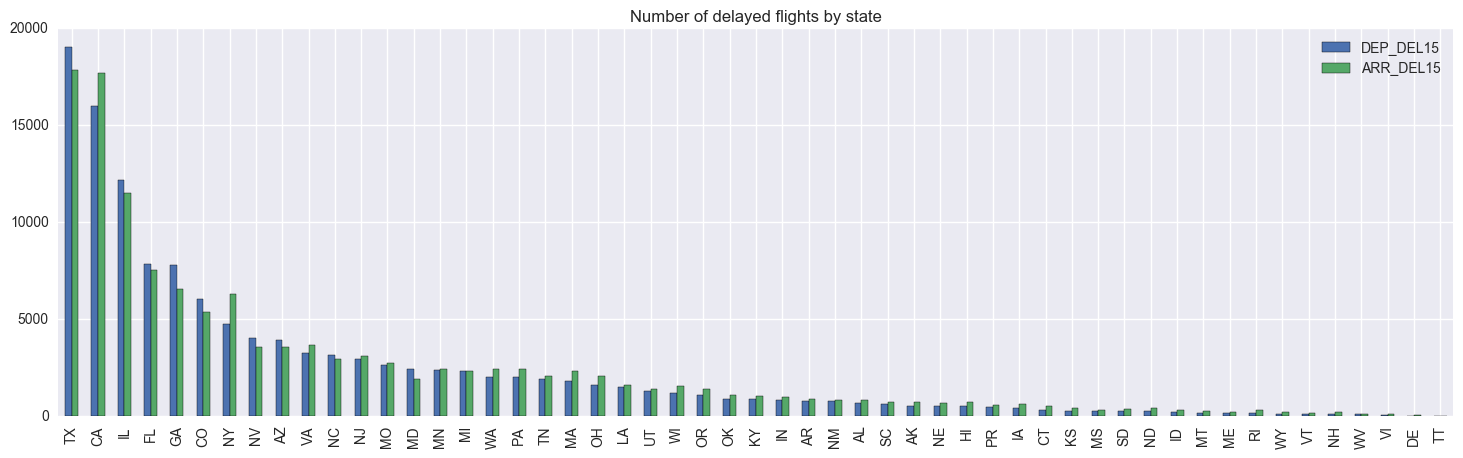

In [65]:
delay_df.sort_values('DEP_DEL15', ascending=False).plot(kind='bar', title='Number of delayed flights by state')

In [66]:
data.ORIGIN_STATE_ABR.value_counts()

CA    64034
TX    61504
IL    34573
FL    34502
GA    32328
      ...  
VT      472
VI      431
WV      294
DE       76
TT       41
Name: ORIGIN_STATE_ABR, dtype: int64

In [28]:
# 以上没有考虑总的航班数目，更好的方式是百分比
pct_departure_delay = departure_delay_counts / data.ORIGIN_STATE_ABR.value_counts()
pct_arrival_delay = arrival_delay_counts / data.DEST_STATE_ABR.value_counts()

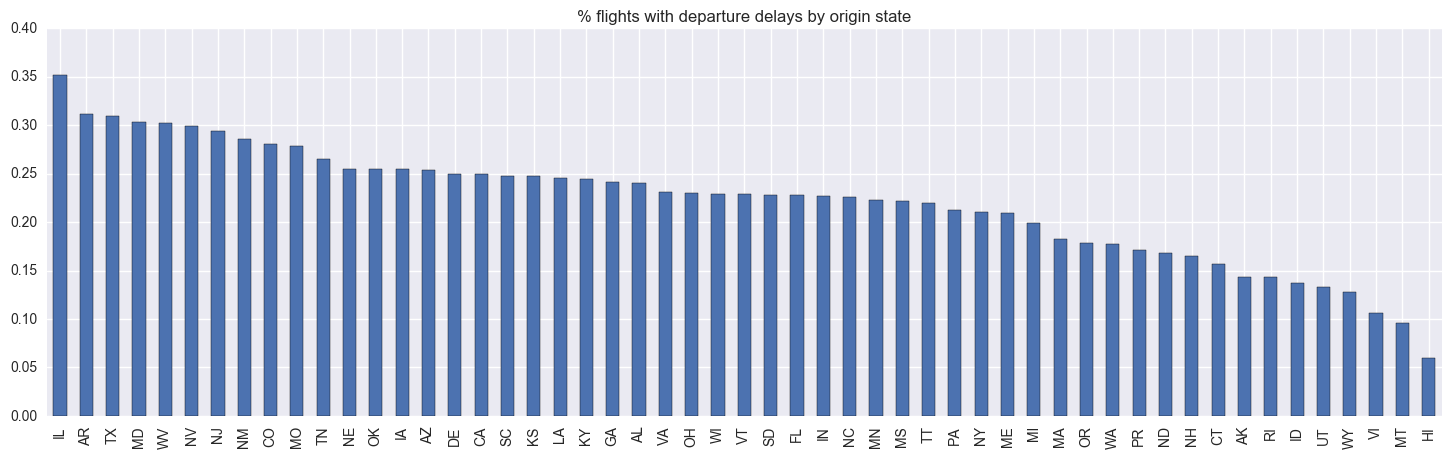

In [67]:
pct_departure_delay.sort_values(ascending=False).plot(kind='bar', title='% flights with departure delays by origin state')

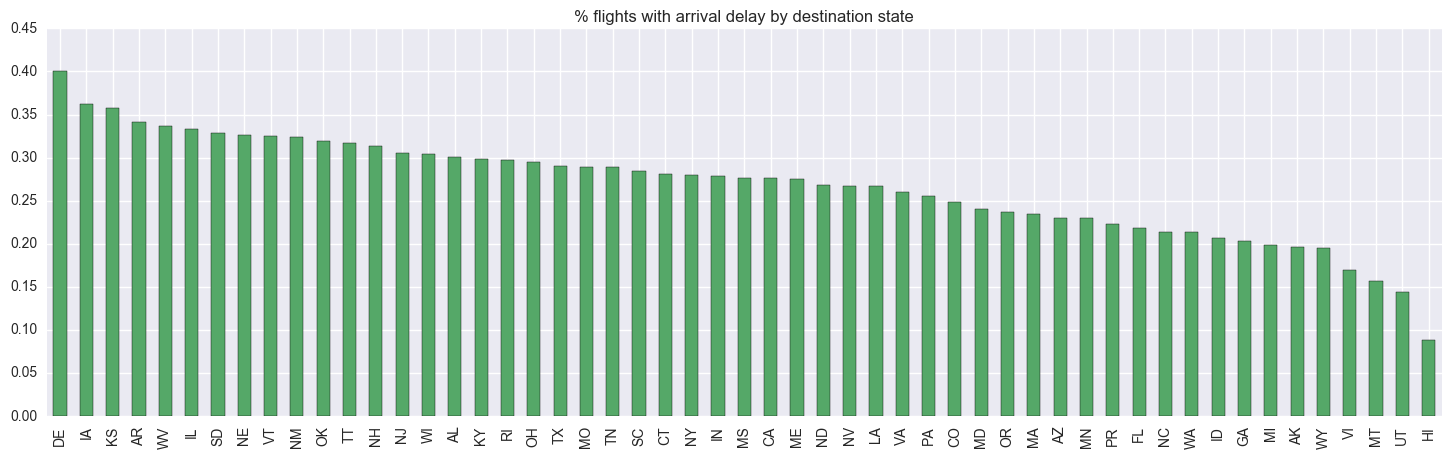

In [68]:
pct_arrival_delay.sort_values(ascending=False).plot(kind='bar', color=colors[1], title='% flights with arrival delay by destination state')

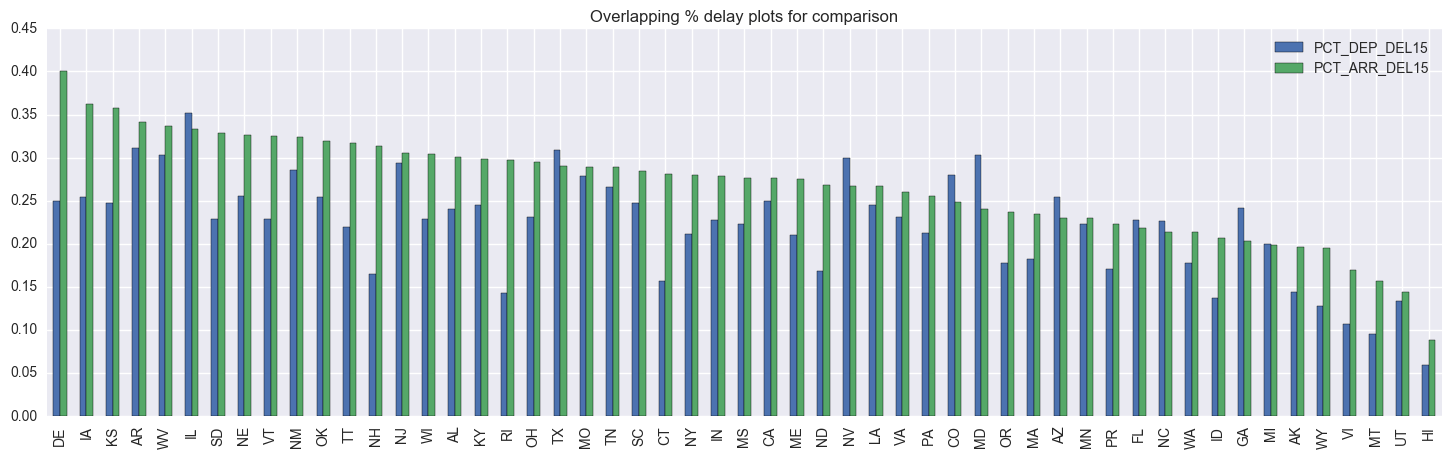

In [31]:
pct_delay_df = pd.DataFrame([pct_departure_delay, pct_arrival_delay], index=['PCT_DEP_DEL15', 'PCT_ARR_DEL15']).T
pct_delay_df.sort_values('PCT_ARR_DEL15', ascending=False).plot(kind='bar', title='Overlapping % delay plots for comparison')

小机场似乎差距大

# 机场间延迟趋势

In [84]:
delay_counts_df = data[['ORIGIN_STATE_ABR', 'DEST_STATE_ABR', 'ARR_DEL15']].groupby(['ORIGIN_STATE_ABR', 'DEST_STATE_ABR']).sum()
delay_counts_df.head()

ARR_DEL15
ORIGIN_STATE_ABR DEST_STATE_ABR           
AK               AK                  351.0
                 AZ                    5.0
                 CA                   11.0
                 CO                   21.0
                 GA                    3.0

In [85]:
support = (delay_counts_df / len(data))
support.head()

ARR_DEL15
ORIGIN_STATE_ABR DEST_STATE_ABR           
AK               AK               0.000698
                 AZ               0.000010
                 CA               0.000022
                 CO               0.000042
                 GA               0.000006

In [86]:
support = support.unstack()
support.head()

ARR_DEL15                                   ...       \
DEST_STATE_ABR          AK  AL        AR        AZ        CA ...   VT   
ORIGIN_STATE_ABR                                             ...        
AK                0.000698 NaN       NaN  0.000010  0.000022 ...  NaN   
AL                     NaN NaN       NaN       NaN       NaN ...  NaN   
AR                     NaN NaN       NaN  0.000008  0.000036 ...  NaN   
AZ                0.000026 NaN  0.000008  0.000129  0.002559 ...  NaN   
CA                0.000056 NaN  0.000008  0.001846  0.011353 ...  NaN   

                                               
DEST_STATE_ABR          WA        WI  WV   WY  
ORIGIN_STATE_ABR                               
AK                0.000209       NaN NaN  NaN  
AL                     NaN       NaN NaN  NaN  
AR                     NaN       NaN NaN  NaN  
AZ                0.000290  0.000062 NaN  NaN  
CA                0.001423  0.000068 NaN  0.0  

[5 rows x 53 columns]

上面的support是有2级index的列(multilevel index)，我们如果想去掉外面的ARR_DEL15可以先转列到行，然后去掉index，之后在转换回去。最终我们就可以得到一个始发-终到机场的延迟比例

In [87]:
support = support.T.reset_index(level=0, drop=True).T
support.head()

DEST_STATE_ABR,AK,AL,AR,AZ,CA,...,VT,WA,WI,WV,WY
ORIGIN_STATE_ABR,,,,,,,,,,,
AK,0.000698,NaN,NaN,0.000010,0.000022,...,NaN,0.000209,NaN,NaN,NaN
AL,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN
AR,NaN,NaN,NaN,0.000008,0.000036,...,NaN,NaN,NaN,NaN,NaN
AZ,0.000026,NaN,0.000008,0.000129,0.002559,...,NaN,0.000290,0.000062,NaN,NaN
CA,0.000056,NaN,0.000008,0.001846,0.011353,...,NaN,0.001423,0.000068,NaN,0.0


In [88]:
def asymmatplot(plotmat, names=None, cmap="Greys", cmap_range=None, ax=None, **kwargs):
    '''
    Plot an asymmetric matrix with colormap and statistic values. A modification of the
    symmatplot() function in Seaborn to show the upper-half of the matrix.
    
    See https://github.com/mwaskom/seaborn/blob/master/seaborn/linearmodels.py for the original.
    '''
    if ax is None:
        ax = plt.gca()

    nvars = len(plotmat)

    if cmap_range is None:
        vmax = np.nanmax(plotmat) * 1.15
        vmin = np.nanmin(plotmat) * 1.15
    elif len(cmap_range) == 2:
        vmin, vmax = cmap_range
    else:
        raise ValueError("cmap_range argument not understood")

    mat_img = ax.matshow(plotmat, cmap=cmap, vmin=vmin, vmax=vmax, **kwargs)

    plt.colorbar(mat_img, shrink=.75)
 
    ax.xaxis.set_ticks_position("bottom")
    ax.set_xticklabels(names, rotation=90)
    ax.set_yticklabels(names)

    minor_ticks = np.linspace(-.5, nvars - 1.5, nvars)
    ax.set_xticks(minor_ticks, True)
    ax.set_yticks(minor_ticks, True)
    major_ticks = np.linspace(0, nvars - 1, nvars)
    ax.set_xticks(major_ticks)
    ax.set_yticks(major_ticks)
    ax.grid(False, which="major")
    ax.grid(True, which="minor", linestyle="-")

    return ax

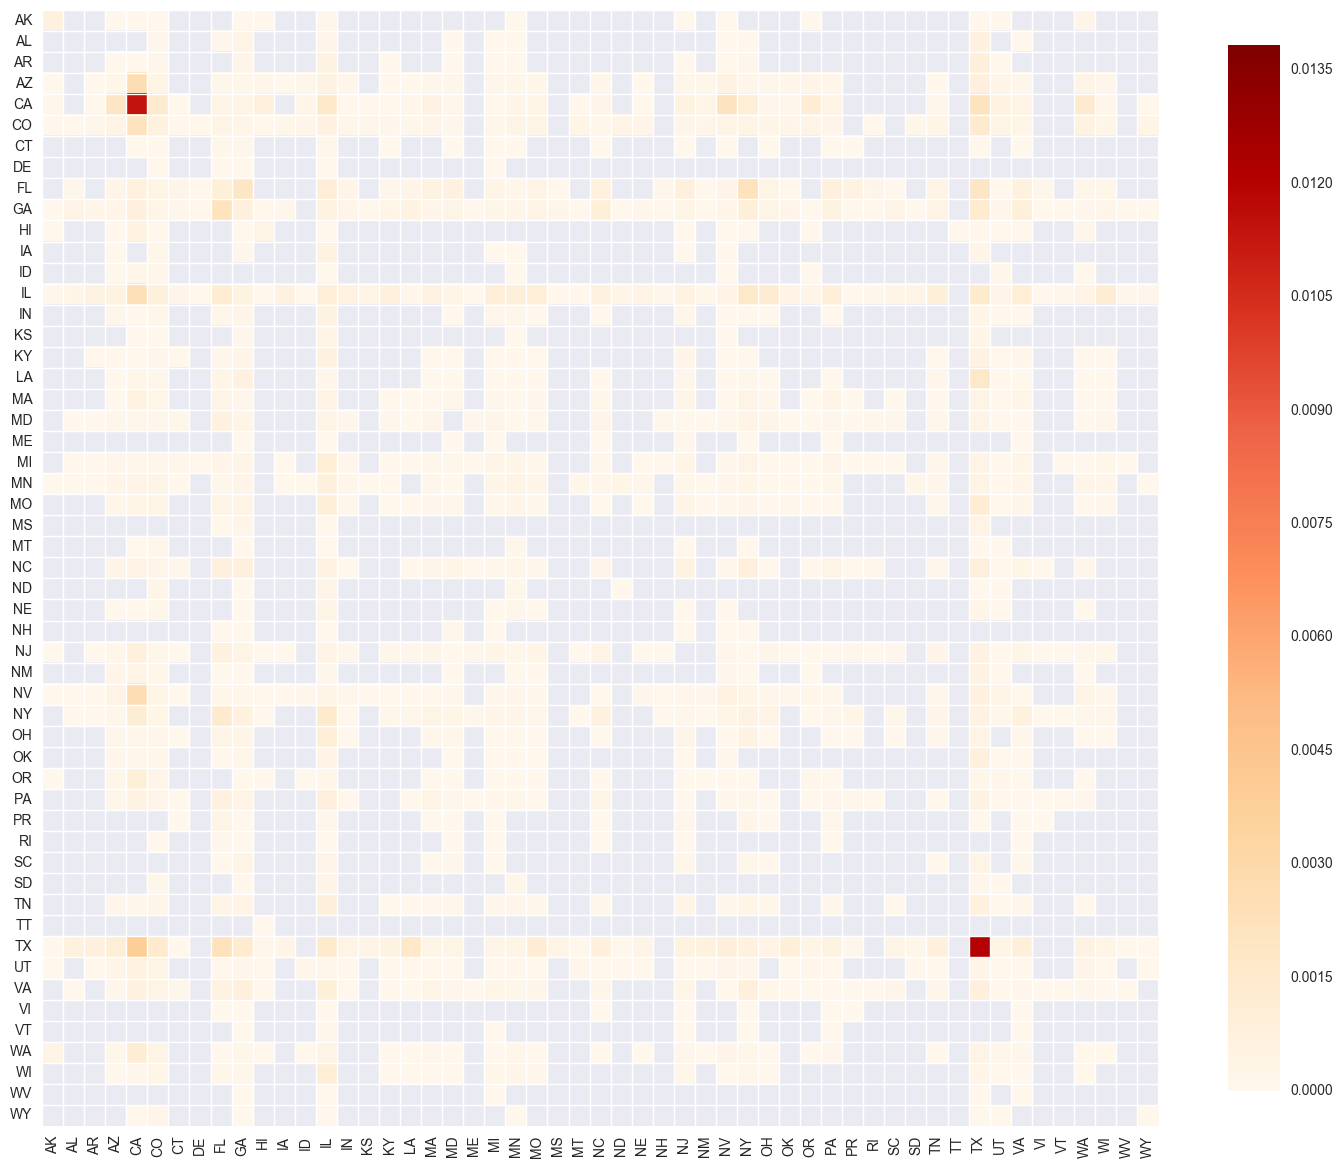

In [77]:
fig, ax = plt.subplots(figsize=(18,18))
asymmatplot(support, names=support.columns, ax=ax, cmap='OrRd')

右边色条给出了延迟的情况,红色代表严重

不过(CA → CA) , (TX → TX)似乎有点延迟厉害

也许延迟和航班数量有关？

In [89]:
trip_counts_df = data[['ORIGIN_STATE_ABR', 'DEST_STATE_ABR', 'FL_DATE']].groupby(['ORIGIN_STATE_ABR', 'DEST_STATE_ABR']).count()

In [90]:
delay_counts_df = delay_counts_df.rename_axis({'ARR_DEL15' : 'COUNTS'}, axis=1)
trip_counts_df = trip_counts_df.rename_axis({'FL_DATE' : 'COUNTS'}, axis=1)

用延迟航班数量除以总航班数

In [91]:
mat = (delay_counts_df / trip_counts_df).unstack().T.reset_index(level=0, drop=True).T

这时我们发现一些与前面不同的信息

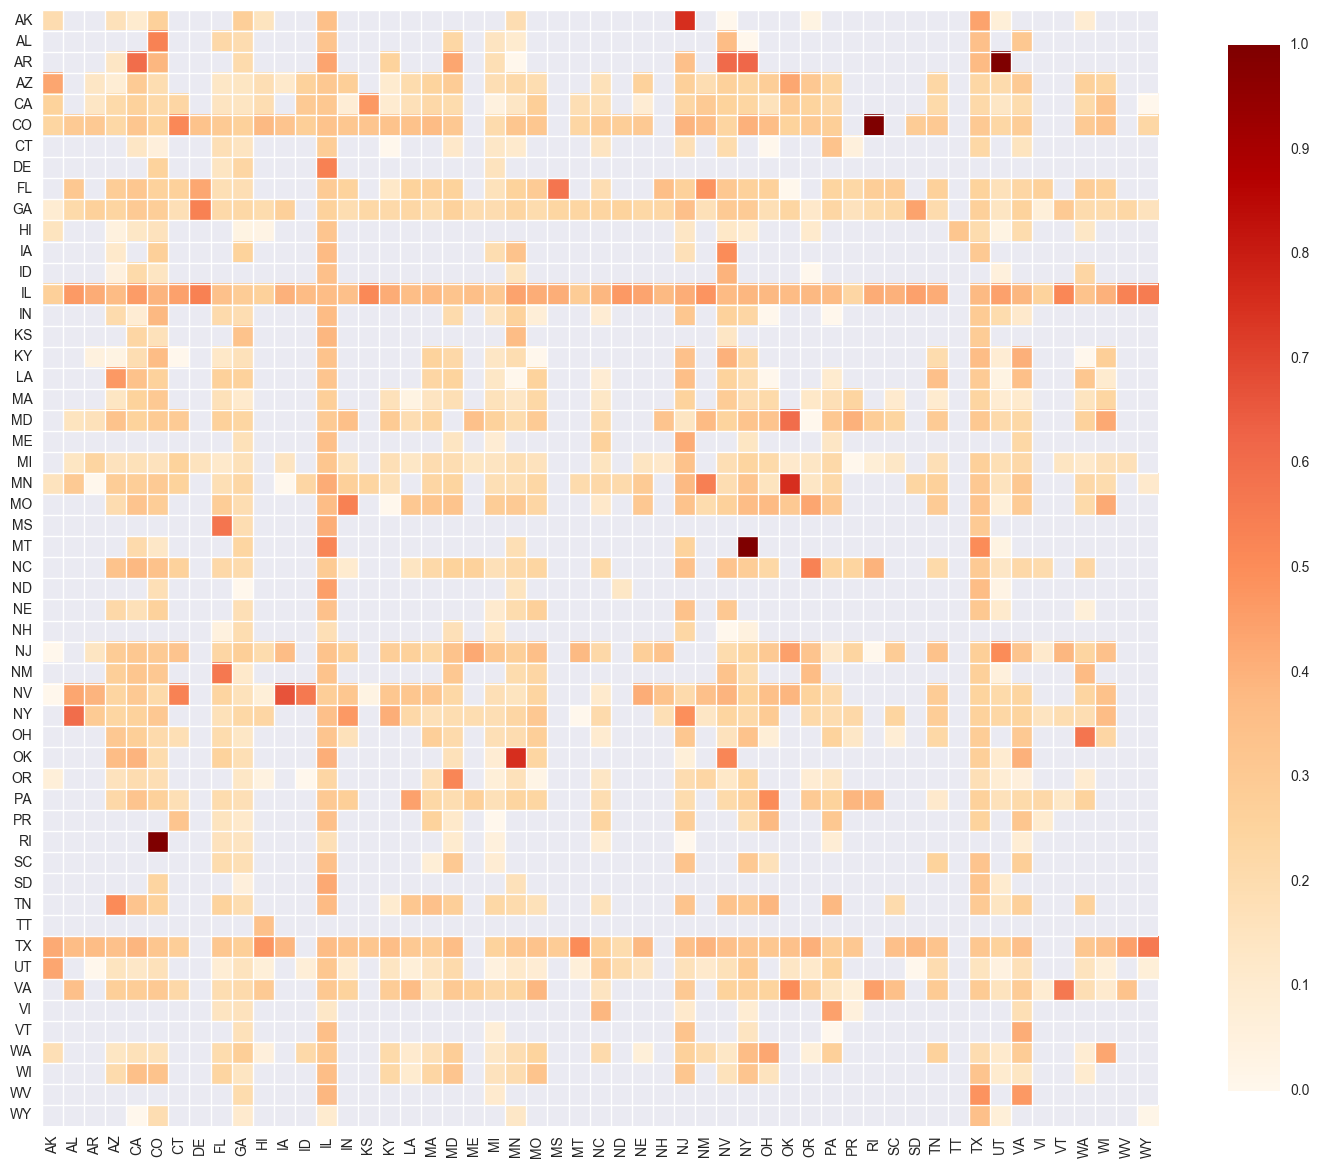

In [92]:
fig, ax = plt.subplots(figsize=(18,18))
asymmatplot(mat, names=mat.columns, ax=ax, cmap='OrRd', cmap_range=(0., 1.0))

# 每日延迟分布情况

每天到达延迟分布情况如何？

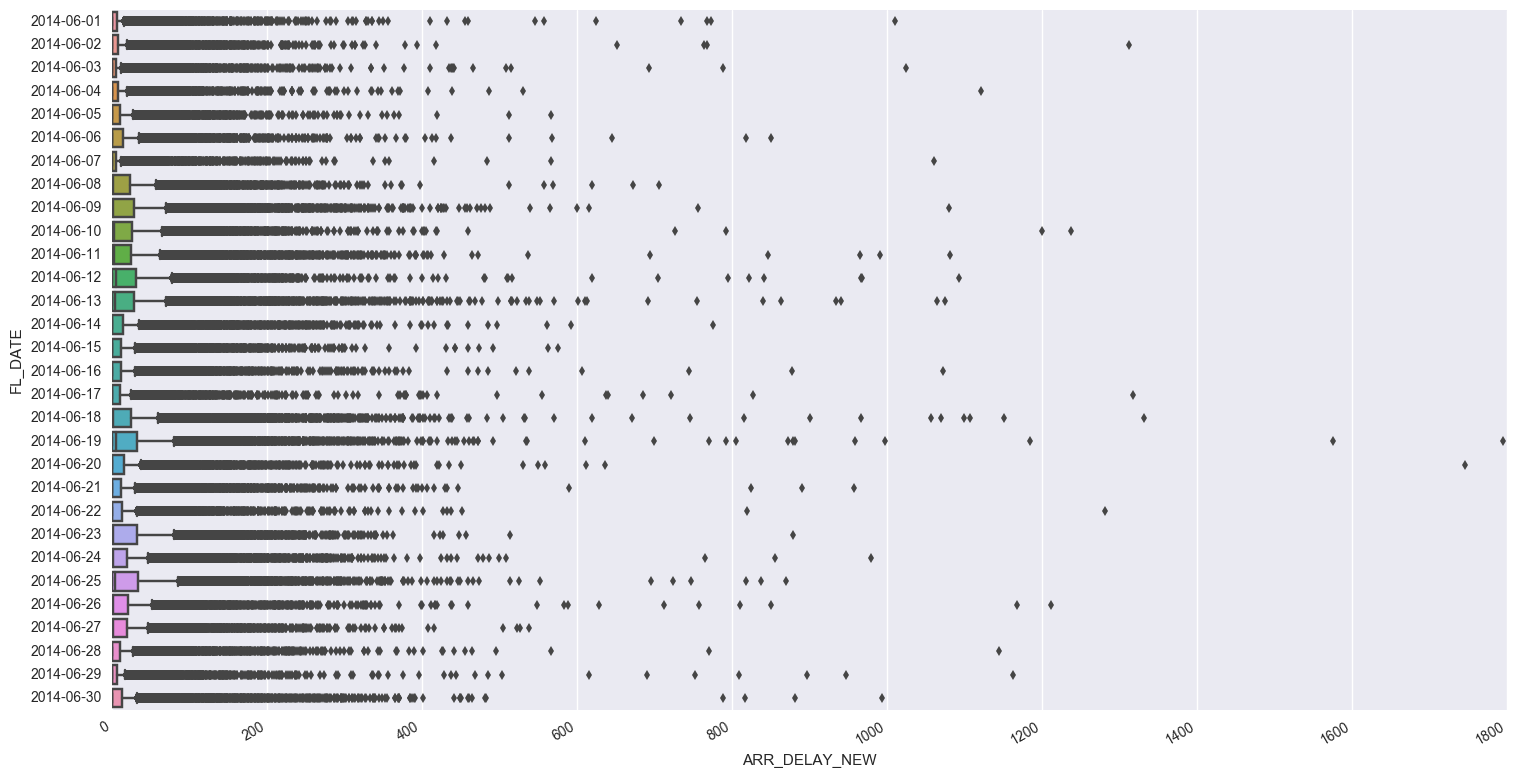

In [93]:
fig, ax = plt.subplots(figsize=(18,10))
sns.boxplot(data.ARR_DELAY_NEW, data.FL_DATE, ax=ax)
fig.autofmt_xdate()

大量的outlier，有的延迟达到12小时以上

In [43]:
sns.boxplot?

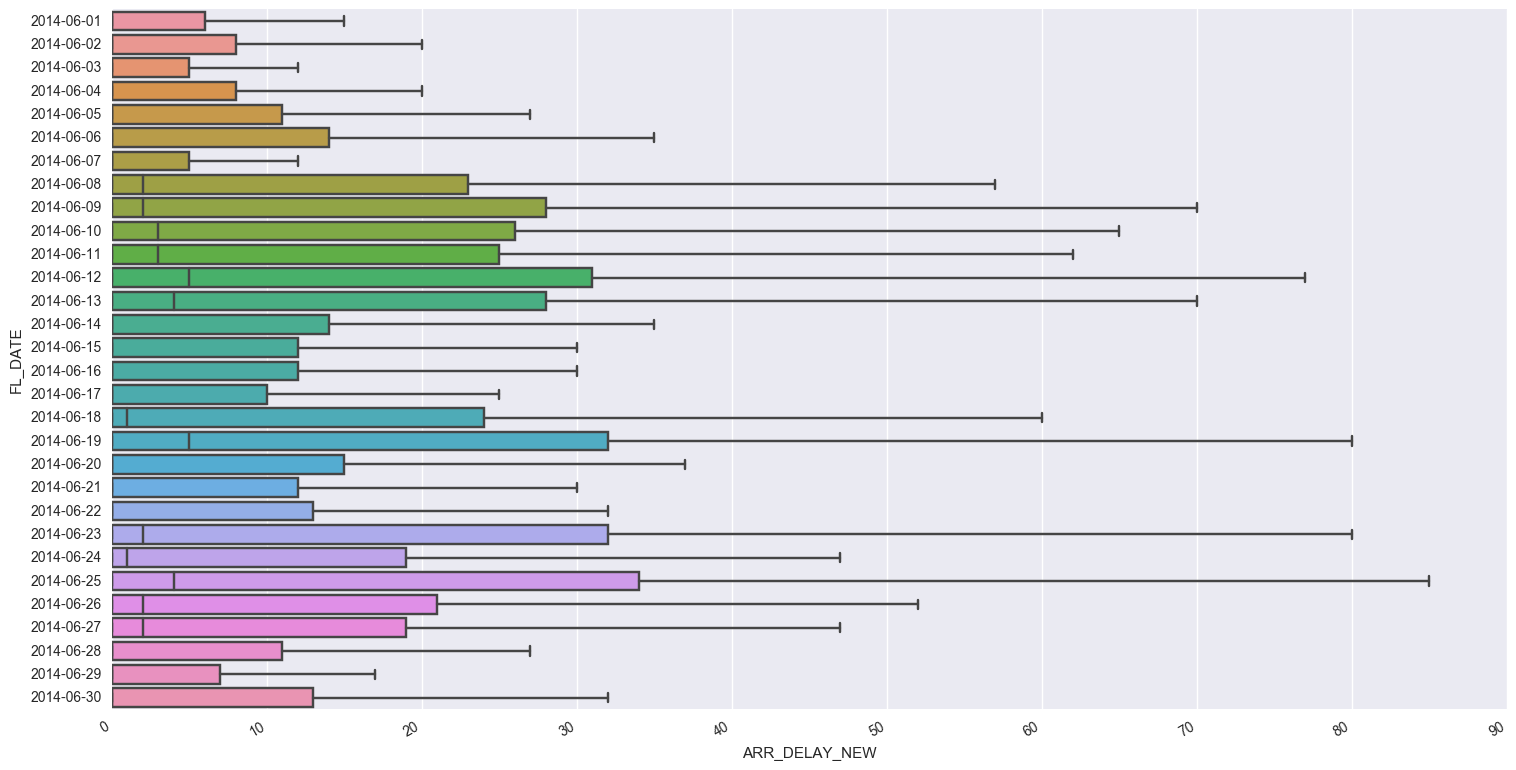

In [94]:
fig, ax = plt.subplots(figsize=(18,10))
sns.boxplot(data.ARR_DELAY_NEW, data.FL_DATE, ax=ax, showfliers=False) #showflier
fig.autofmt_xdate()

大部分情况median arrival delay 是准时到达!

更多的分析方向：
1. 建立一个模型来分析航班延迟
2. 与天气结合
3. 不同的航运公司航班准点情况？